In [132]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

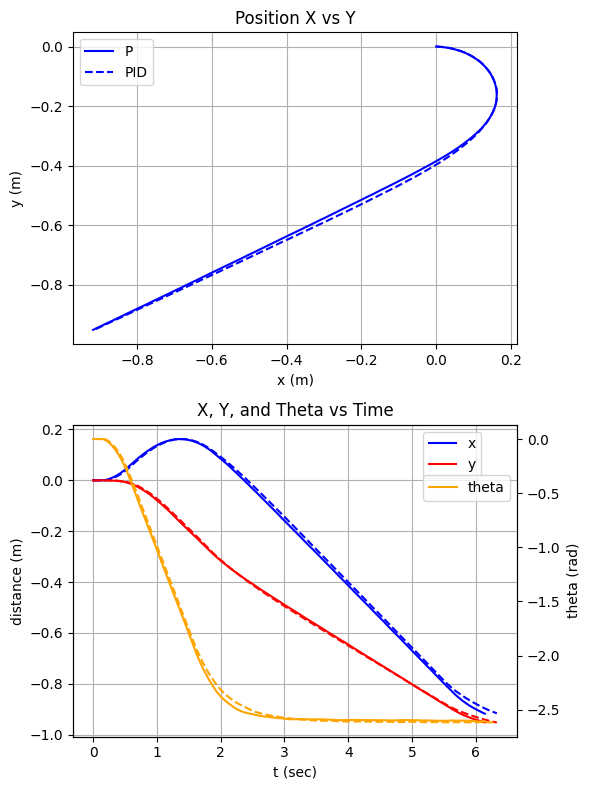

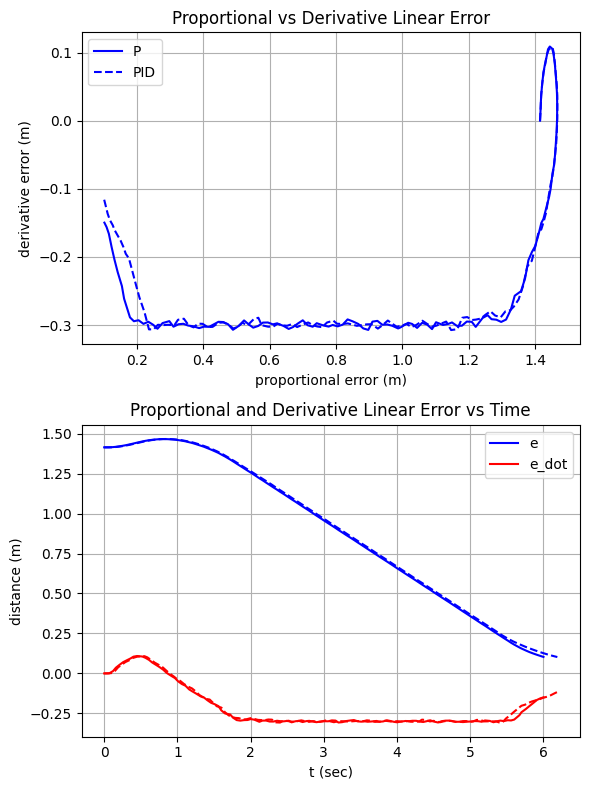

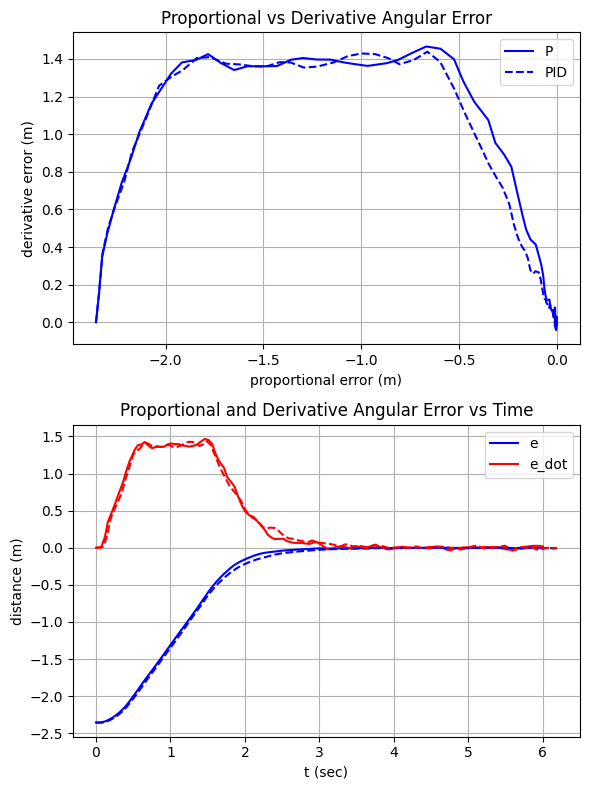

In [139]:
x_t_sigmoid = np.arange(int(2.5 * 100)) / 100
x_t_parabola = np.arange(int(1.5 * 100)) / 100

sigmoid = 2 / (1 + np.exp(-2 * x_t_sigmoid)) - 1
parabola = np.square(x_t_parabola)


def plot_point_pose(filename1, filename2):

    df = pd.read_csv(filename1)
    theta1 = df['theta'].to_numpy()
    x1 = df['x'].to_numpy()
    y1 = df['y'].to_numpy()
    t1 = df['stamp'].to_numpy()
    t1 = (t1 - t1[0]) / 1e9 # Convert the 'stamp' column from nanoseconds to seconds

    df = pd.read_csv(filename2)
    theta2 = df['theta'].to_numpy()
    x2 = df['x'].to_numpy()
    y2 = df['y'].to_numpy()
    t2 = df['stamp'].to_numpy()
    t2 = (t2 - t2[0]) / 1e9

    fig, axes = plt.subplots(2, 1, figsize=(6,8))

    axes[0].plot(x1, y1, label='P', color='blue')
    axes[0].plot(x2, y2, label='PID', color='blue', linestyle='--')
    # plt.plot(x_t_sigmoid, sigmoid)
    # plt.plot(x_t_parabola, parabola, linestyle='--')
    axes[0].set_title('Position X vs Y')
    axes[0].set_xlabel('x (m)')
    axes[0].set_ylabel('y (m)')
    axes[0].legend()
    axes[0].grid(True)

    axes[1].plot(t1, x1, label='x', color='blue')
    axes[1].plot(t1, y1, label='y', color='red')
    axes[1].plot(t2, x2, color='blue', linestyle='--')
    axes[1].plot(t2, y2, color='red', linestyle='--')
    axes[1].set_title('X, Y, and Theta vs Time')
    axes[1].set_xlabel('t (sec)')
    axes[1].set_ylabel('distance (m)')
    axes[1].legend(bbox_to_anchor=(0.935, 1))

    axes_theta = axes[1].twinx()
    axes_theta.plot(t1, theta1, label='theta', color='orange')
    axes_theta.plot(t2, theta2, color='orange', linestyle='--')
    axes_theta.set_xlabel('t (sec)')
    axes_theta.set_ylabel('theta (rad)')
    axes_theta.legend(loc='upper right', bbox_to_anchor=(1, 0.86))

    axes[1].grid(True)

    plt.tight_layout()
    plt.show()


def plot_point_error(filename1, filename2):

    error_type = "Linear" if "linear" in filename1.lower() else "Angular"

    df = pd.read_csv(filename1)
    e1 = df['e'].to_numpy()
    e_dot1 = df['e_dot'].to_numpy()
    e_int1 = df['e_int'].to_numpy()
    t1 = df['stamp'].to_numpy()
    t1 = (t1 - t1[0]) / 1e9

    df = pd.read_csv(filename2)
    e2 = df['e'].to_numpy()
    e_dot2 = df['e_dot'].to_numpy()
    e_int2 = df['e_int'].to_numpy()
    t2 = df['stamp'].to_numpy()
    t2 = (t2 - t2[0]) / 1e9

    fig, axes = plt.subplots(2, 1, figsize=(6,8))

    axes[0].plot(e1, e_dot1, label='P', color='blue')
    axes[0].plot(e2, e_dot2, label='PID', color='blue', linestyle='--')
    axes[0].set_title(f'Proportional vs Derivative {error_type} Error')
    axes[0].set_xlabel('proportional error (m)')
    axes[0].set_ylabel('derivative error (m)')
    axes[0].legend()
    axes[0].grid(True)
    
    axes[1].plot(t1, e1, label='e', color='blue')
    axes[1].plot(t1, e_dot1, label='e_dot', color='red')
    axes[1].plot(t2, e2, color='blue', linestyle='--')
    axes[1].plot(t2, e_dot2, color='red', linestyle='--')
    axes[1].set_title(f'Proportional and Derivative {error_type} Error vs Time')
    axes[1].set_xlabel('t (sec)')
    axes[1].set_ylabel('distance (m)')
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()


plot_point_pose('Point_P_controller/robot_pose.csv', 'Point_PID_controller/robot_pose.csv')
plot_point_error('Point_P_controller/linear_errors.csv', 'Point_PID_controller/linear_errors.csv')
plot_point_error('Point_P_controller/angular_errors.csv', 'Point_PID_controller/angular_errors.csv')